In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import pickle
from matplotlib.animation import ArtistAnimation

import itertools
from collections import OrderedDict

In [ ]:
!pip install pygame
!pip install matplotlib

In [ ]:
!pip install mido

In [ ]:
!pip install pretty_midi

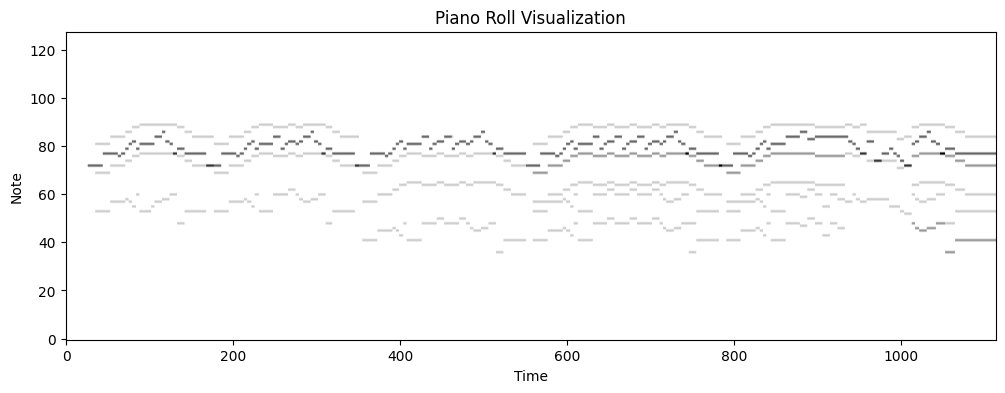

In [ ]:
import pretty_midi
import matplotlib.pyplot as plt

# Load a MIDI file
midi_data = pretty_midi.PrettyMIDI('/content/drive/MyDrive/Colab Notebooks/pianoPlayer/notebooks/Christmas_Carols_-_12_Days_Of_Christmas.mid')

# Create a piano roll from the MIDI data
piano_roll = midi_data.get_piano_roll(fs=20)  # Adjust fs as needed for time resolution

# Visualize the piano roll
plt.figure(figsize=(12, 4))
plt.imshow(piano_roll, cmap='binary', origin='lower', aspect='auto')
plt.xlabel('Time')
plt.ylabel('Note')
plt.title('Piano Roll Visualization')
plt.show()


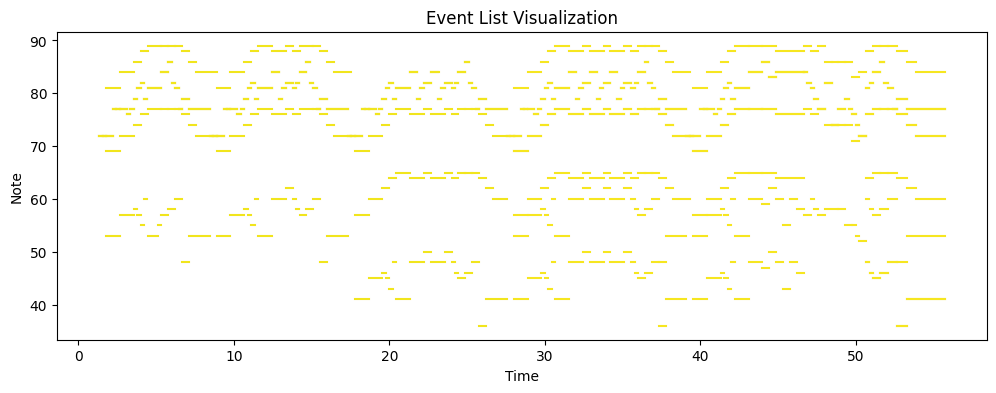

In [ ]:
#Event List Visualization:
#Visualize MIDI events such as notes, velocity, and time.
import pretty_midi
import matplotlib.pyplot as plt

# Load a MIDI file
midi_data = pretty_midi.PrettyMIDI('/content/drive/MyDrive/Colab Notebooks/pianoPlayer/notebooks/Christmas_Carols_-_12_Days_Of_Christmas.mid')

# Extract note events (note_on and note_off)
note_events = []
for instrument in midi_data.instruments:
    for note in instrument.notes:
        note_events.append((note.start, note.end, note.pitch, note.velocity))

# Visualize the note events
plt.figure(figsize=(12, 4))
for start, end, pitch, velocity in note_events:
    plt.plot([start, end], [pitch, pitch], color=plt.cm.viridis(velocity / 128.0))
plt.xlabel('Time')
plt.ylabel('Note')
plt.title('Event List Visualization')
plt.show()


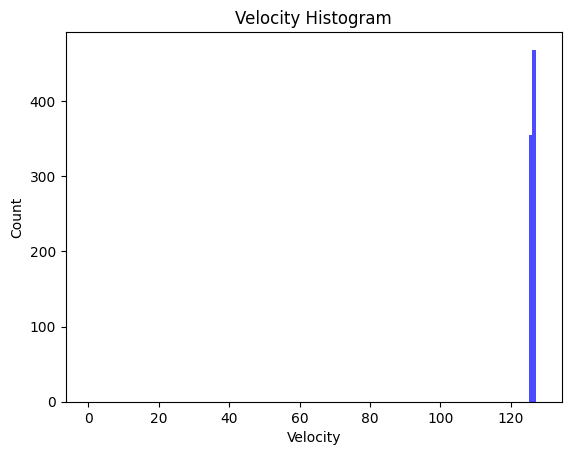

In [ ]:
#Velocity Histogram:
#Visualize the distribution of note velocities.
import pretty_midi
import matplotlib.pyplot as plt

# Load a MIDI file
midi_data = pretty_midi.PrettyMIDI('/content/drive/MyDrive/Colab Notebooks/pianoPlayer/notebooks/Christmas_Carols_-_12_Days_Of_Christmas.mid')

# Extract note velocities
velocities = []
for instrument in midi_data.instruments:
    for note in instrument.notes:
        velocities.append(note.velocity)

# Visualize the velocity distribution
plt.hist(velocities, bins=128, range=(0, 128), color='blue', alpha=0.7)
plt.xlabel('Velocity')
plt.ylabel('Count')
plt.title('Velocity Histogram')
plt.show()


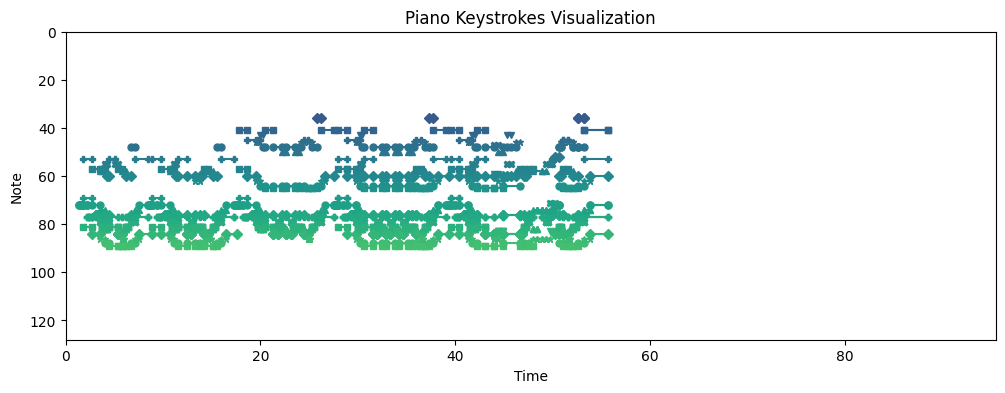

In [ ]:
import pretty_midi
import matplotlib.pyplot as plt
import numpy as np

# Load a MIDI file
midi_data = pretty_midi.PrettyMIDI('/content/drive/MyDrive/Colab Notebooks/pianoPlayer/notebooks/Christmas_Carols_-_12_Days_Of_Christmas.mid')

# Extract note events
note_events = []
for instrument in midi_data.instruments:
    for note in instrument.notes:
        note_events.append((note.start, note.end, note.pitch, note.velocity))

# Sort note events by start time
note_events.sort(key=lambda x: x[0])

# Define colors and markers for different notes
colors = plt.cm.viridis(np.linspace(0, 1, 128))  # You can choose any colormap
markers = ['o', 's', '^', 'v', 'D', 'P', '*', 'X']

# Create a timeline plot
fig, ax = plt.subplots(figsize=(12, 4))
for i, (start, end, pitch, velocity) in enumerate(note_events):
    color = colors[pitch]
    marker = markers[pitch % len(markers)]
    ax.plot([start, end], [pitch, pitch], color=color, marker=marker, markersize=5, label=f'Pitch {pitch}')

ax.set_xlim(0, midi_data.get_end_time())
ax.set_ylim(0, 128)
ax.invert_yaxis()  # Invert y-axis for proper piano representation

plt.xlabel('Time')
plt.ylabel('Note')
plt.title('Piano Keystrokes Visualization')
#plt.legend(title='Pitches', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


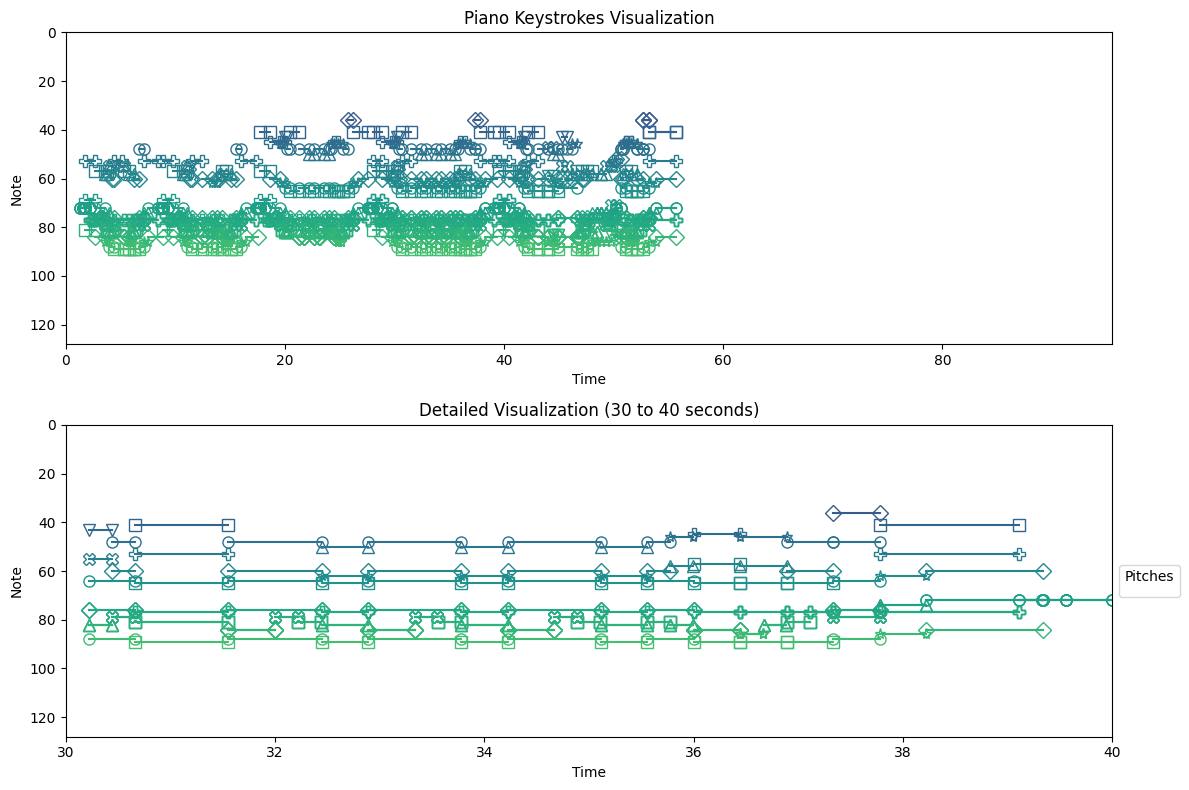

In [ ]:
import pretty_midi
import matplotlib.pyplot as plt
import numpy as np

# Load a MIDI file
midi_data = pretty_midi.PrettyMIDI('/content/drive/MyDrive/Colab Notebooks/pianoPlayer/notebooks/Christmas_Carols_-_12_Days_Of_Christmas.mid')

# Extract note events
note_events = []
for instrument in midi_data.instruments:
    for note in instrument.notes:
        note_events.append((note.start, note.end, note.pitch, note.velocity))

# Sort note events by start time
note_events.sort(key=lambda x: x[0])

# Define colors and markers for different notes
colors = plt.cm.viridis(np.linspace(0, 1, 128))  # You can choose any colormap
markers = ['o', 's', '^', 'v', 'D', 'P', '*', 'X']

# Create a timeline plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot the entire timeline
for i, (start, end, pitch, velocity) in enumerate(note_events):
    color = colors[pitch]
    marker = markers[pitch % len(markers)]
    ax1.plot([start, end], [pitch, pitch], color=color, marker=marker, markersize=8, markerfacecolor='none')

ax1.set_xlim(0, midi_data.get_end_time())
ax1.set_ylim(0, 128)
ax1.invert_yaxis()  # Invert y-axis for proper piano representation

ax1.set_xlabel('Time')
ax1.set_ylabel('Note')
ax1.set_title('Piano Keystrokes Visualization')

# Select a time slice (e.g., 10 seconds) for detailed visualization
start_time_slice = 30  # Adjust as needed
end_time_slice = start_time_slice + 10  # Adjust as needed

# Plot the selected time slice in more detail
for i, (start, end, pitch, velocity) in enumerate(note_events):
    if start >= start_time_slice and end <= end_time_slice:
        color = colors[pitch]
        marker = markers[pitch % len(markers)]
        ax2.plot([start, end], [pitch, pitch], color=color, marker=marker, markersize=8, markerfacecolor='none')

ax2.set_xlim(start_time_slice, end_time_slice)
ax2.set_ylim(0, 128)
ax2.invert_yaxis()  # Invert y-axis for proper piano representation

ax2.set_xlabel('Time')
ax2.set_ylabel('Note')
plt.legend(title='Pitches', loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_title('Detailed Visualization ({} to {} seconds)'.format(start_time_slice, end_time_slice))

plt.tight_layout()
plt.show()


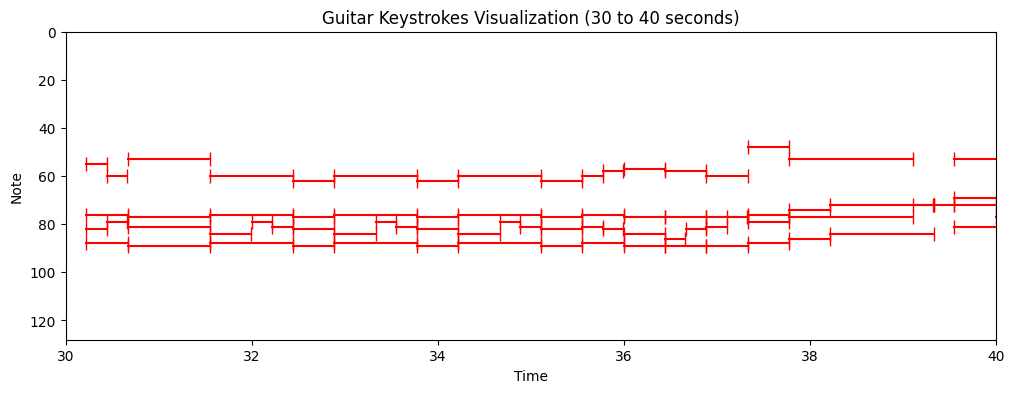

In [ ]:
import pretty_midi
import matplotlib.pyplot as plt

# Load a MIDI file (replace with your MIDI file)
midi_data = pretty_midi.PrettyMIDI('/content/drive/MyDrive/Colab Notebooks/pianoPlayer/notebooks/Christmas_Carols_-_12_Days_Of_Christmas.mid')

# Extract guitar note events for the selected time slice
guitar_notes = []

# Define the start and end times for the selected time slice (adjust as needed)
start_time_slice = 30
end_time_slice = start_time_slice + 10

for instrument in midi_data.instruments:
    if instrument.program < 24:  # Assuming guitar program number range
        for note in instrument.notes:
            if start_time_slice <= note.start <= end_time_slice:
                guitar_notes.append((note.start, note.end, note.pitch))

# Create a timeline plot for guitar notes using custom symbols
fig, ax = plt.subplots(figsize=(12, 4))

for start, end, pitch in guitar_notes:
    # Customize the symbol for guitar notes (e.g., use vertical bars)
    ax.plot([start, end], [pitch, pitch], color='red', marker='|', markersize=10, markerfacecolor='none')

ax.set_xlim(start_time_slice, end_time_slice)
ax.set_ylim(0, 128)
ax.invert_yaxis()
ax.set_xlabel('Time')
ax.set_ylabel('Note')
ax.set_title('Guitar Keystrokes Visualization ({} to {} seconds)'.format(start_time_slice, end_time_slice))

plt.show()


In [ ]:
!pip install librosa

In [ ]:
import librosa

# Load the audio file
audio_file = '/content/drive/MyDrive/Colab Notebooks/pianoPlayer/notebooks/drum.wav'
y, sr = librosa.load(audio_file)

In [ ]:
import librosa.beat

# Detect beat events
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

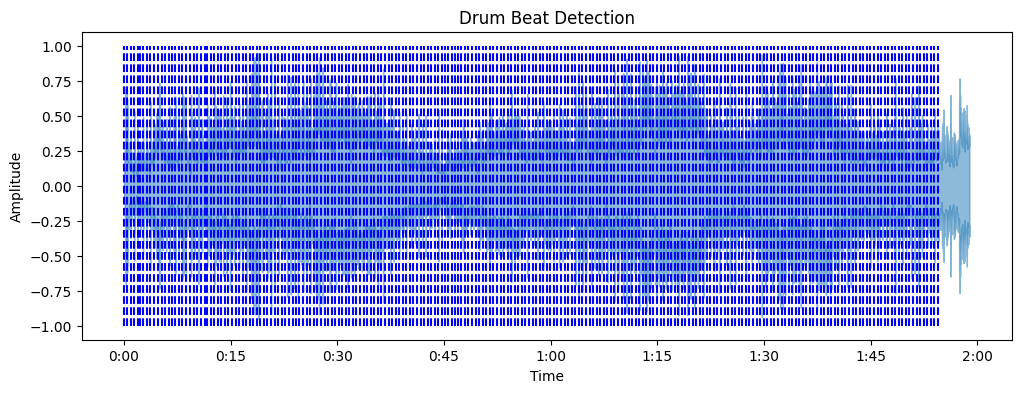

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file = '/content/drive/MyDrive/Colab Notebooks/pianoPlayer/notebooks/drum.wav'
y, sr = librosa.load(audio_file)

# Detect beat events
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# Create a timeline plot
fig, ax = plt.subplots(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
ax.vlines(librosa.frames_to_time(beat_frames), -1, 1, color='b', linestyle='--')

ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_title('Drum Beat Detection')

plt.show()


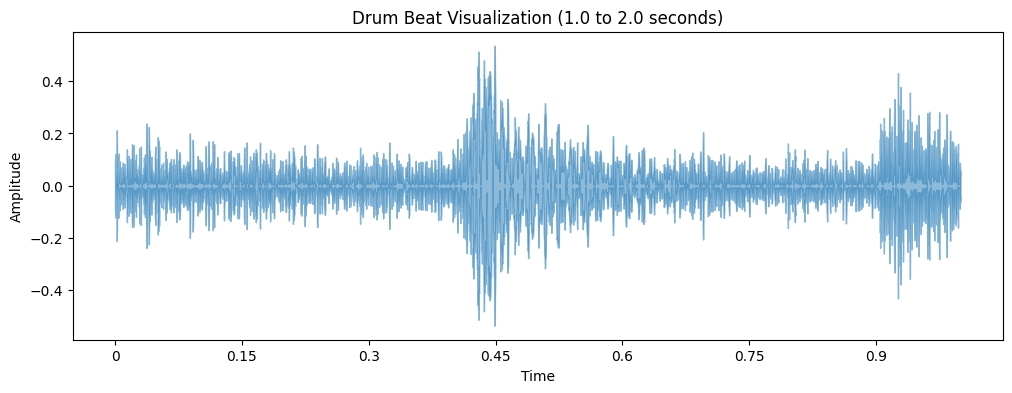

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file = '/content/drive/MyDrive/Colab Notebooks/pianoPlayer/notebooks/drum.wav'
y, sr = librosa.load(audio_file)

# Define the start and end times of the portion to visualize
start_time = 1.0  # Adjust to your desired start time in seconds
end_time = 2.0    # Adjust to your desired end time in seconds

# Convert the start and end times to sample indices
start_sample = librosa.time_to_samples(start_time, sr=sr)
end_sample = librosa.time_to_samples(end_time, sr=sr)

# Extract the portion of the audio to visualize
portion = y[start_sample:end_sample]

# Create a timeline plot for the selected portion
fig, ax = plt.subplots(figsize=(12, 4))
librosa.display.waveshow(portion, sr=sr, alpha=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_title(f'Drum Beat Visualization ({start_time} to {end_time} seconds)')

plt.show()


In [ ]:
!pip install pydub numpy matplotlib


In [ ]:
!pip install librosa
!pip install matplotlib


<ipython-input-5-ba904307c3a2>:10: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(noisy_audio), ref=np.max)
<ipython-input-5-ba904307c3a2>:26: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [50]  # Adjust the size of the legend marker


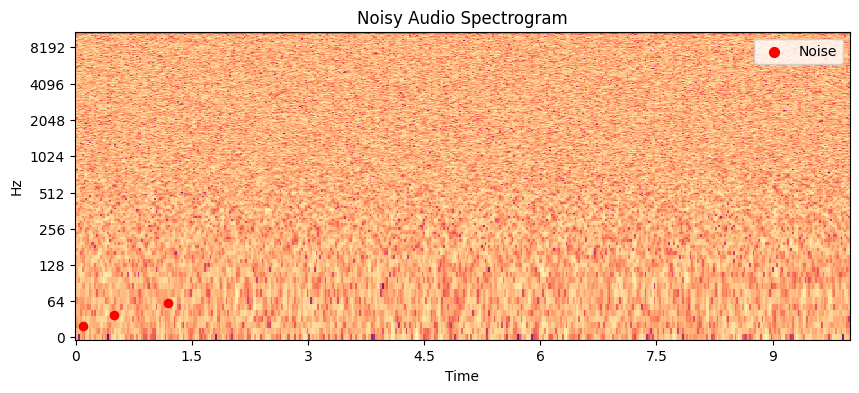

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the noisy audio
noisy_audio, sr = librosa.load('/content/audiocheck.net_whitenoise.wav')

# Create and plot the spectrogram for the noisy audio
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(librosa.stft(noisy_audio), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.title("Noisy Audio Spectrogram")

# Define the shape, color, and notation for noise representation
noise_marker = 'o'  # You can change this to a different marker shape
noise_color = 'red'  # You can change this to a different color

# Customize the visualization for noise
# In this example, we're plotting a red circle for noise points
noise_x = [0.1, 0.5, 1.2]  # Adjust these values as needed to represent noise instances
noise_y = [20, 40, 60]  # Adjust these values as needed to represent noise instances
plt.scatter(noise_x, noise_y, c=noise_color, marker=noise_marker, label='Noise')

# Customize the legend
legend = plt.legend(loc='upper right')
legend.legendHandles[0]._sizes = [50]  # Adjust the size of the legend marker
legend.get_texts()[0].set_text('Noise')  # Change the label in the legend

plt.show()


In [ ]:
!pip install pydub
!pip install simpleaudio


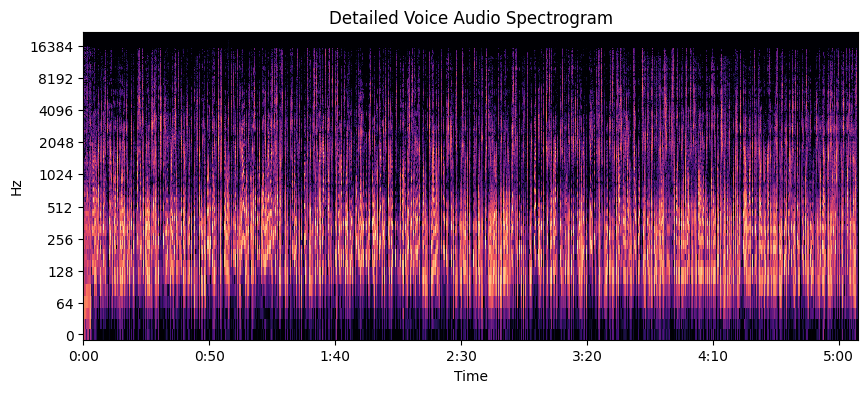

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the MP3 audio file (replace 'your_voice_audio.mp3' with your file path)
audio_file = 'music.mp3'

# Load the audio using librosa
y, sr = librosa.load(audio_file, sr=None)

# Define a function to extract voice activity
def extract_voice_activity(y, threshold=0.02):
    energy = np.sum(y ** 2)
    thresholded = np.where(y ** 2 > threshold * energy, 1, 0)
    return thresholded

# Extract voice activity
voice_activity = extract_voice_activity(y)

# Create a time array
time = np.arange(len(y)) / sr

# Create and plot the spectrogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.title("Detailed Voice Audio Spectrogram")

plt.show()
